In [104]:
import numpy as np             
import pandas as pd         
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from IPython.display import Image



In [60]:
data_row = pd.read_csv('salary.csv') 
data_row 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Визуализация данных, вычисление основных характеристик

In [61]:
data_row.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [62]:
numeric_parameters = [column for column in data_row.columns if data_row[column].dtype.name != 'object']
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [63]:
data_row.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
category_parameters = [column for column in data_row.columns if data_row[column].dtype.name == 'object']
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [65]:
data_row['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [66]:
data_row['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [67]:
data_row['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [68]:
data_row['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [69]:
data_row['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [70]:
data_row['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [71]:
data_row['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [72]:
data_row['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

Пропущенные значения sex = 583

In [74]:
data_row['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [75]:
data_row['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

# Обработка пропущенных значений

In [76]:
data_row['workclass'].replace(' ?', np.nan, inplace=True)
data_row['occupation'].replace(' ?', np.nan, inplace=True)
data_row['native-country'].replace(' ?', np.nan, inplace=True)
data_row.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [77]:
data_row['workclass'].mode()[0]

' Private'

In [78]:
data_row['occupation'][data_row['workclass'] == data_row['workclass'].mode()[0]].mode()[0]   

' Craft-repair'

In [79]:
data_row['native-country'].mode()[0]

' United-States'

In [80]:
data_row['workclass'].fillna(data_row['workclass'].mode()[0], inplace=True)
data_row['occupation'].fillna(data_row['occupation'][data_row['workclass'] == data_row['workclass'].mode()[0]].mode()[0], inplace=True)
data_row['native-country'].fillna(data_row['native-country'].mode()[0], inplace=True)

In [81]:
data_row.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [82]:
numeric_cols = data_row.select_dtypes(include=['int', 'float']).columns
corr_matrix = data_row[numeric_cols].corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


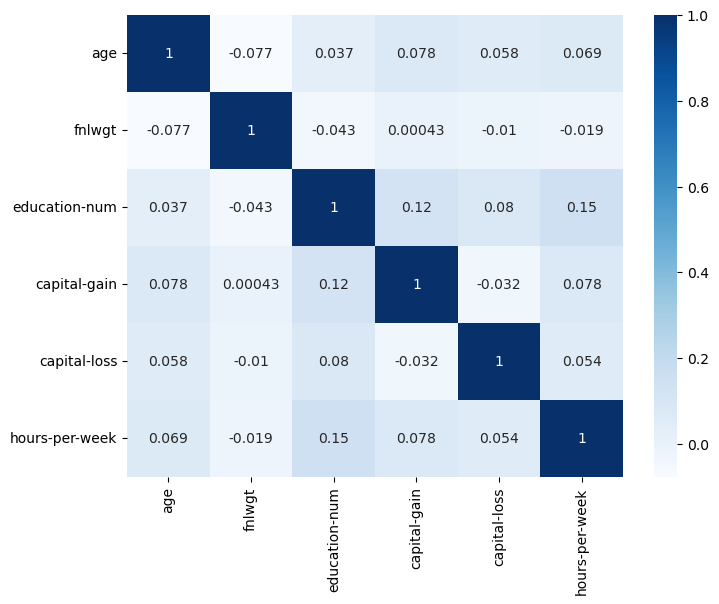

In [83]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

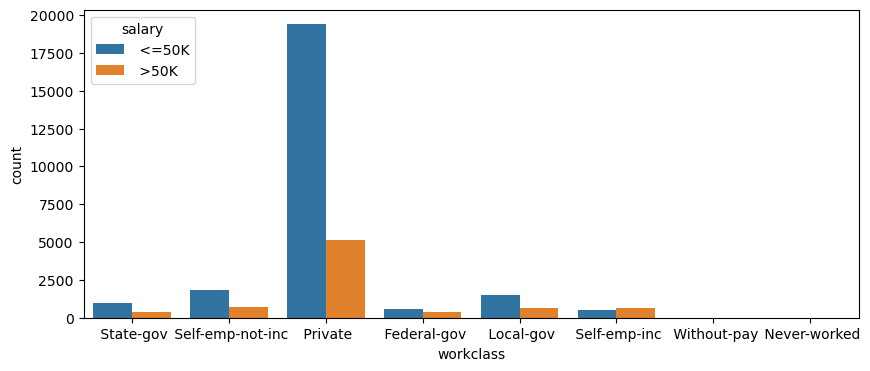

In [84]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data_row, x='workclass', hue ='salary')
plt.show()

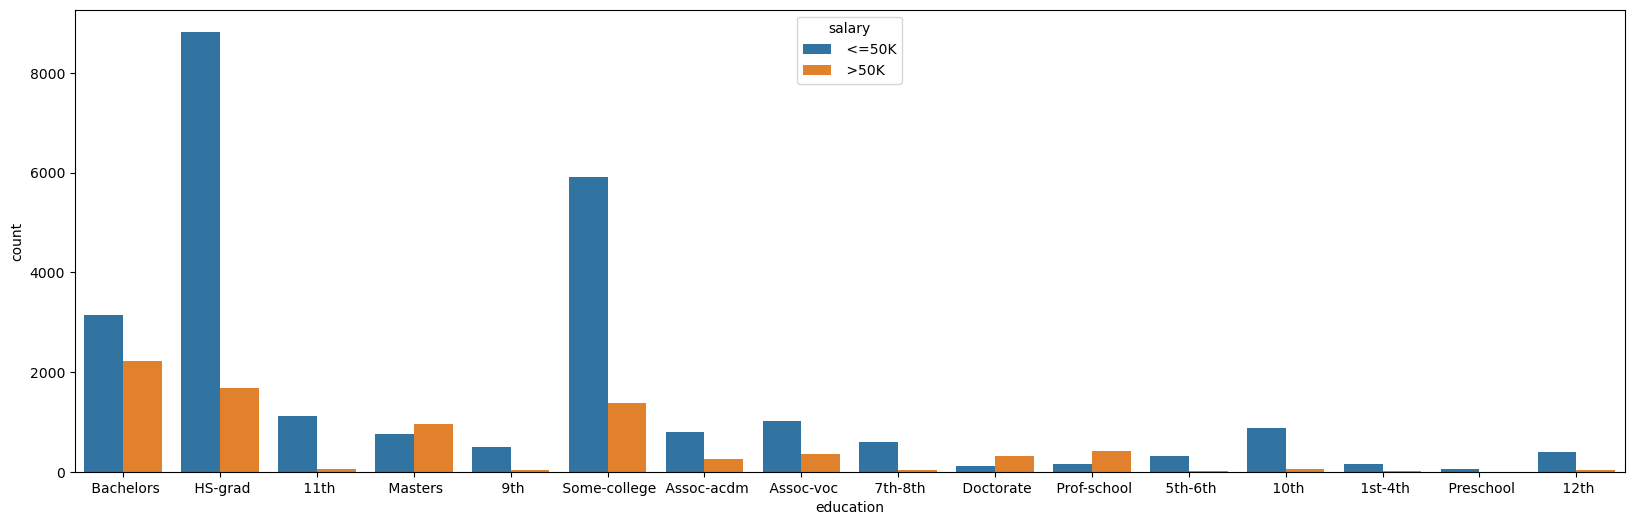

In [85]:
plt.figure(figsize=(20, 6))
sns.countplot(data=data_row, x ='education', hue ='salary')
plt.show()

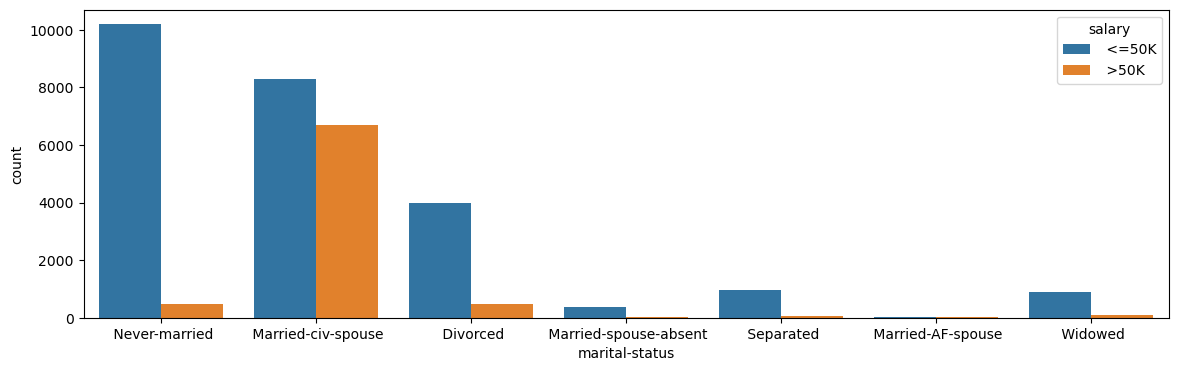

In [86]:
plt.figure(figsize = (14, 4))
sns.countplot(data = data_row, x ='marital-status', hue ='salary')
plt.show()

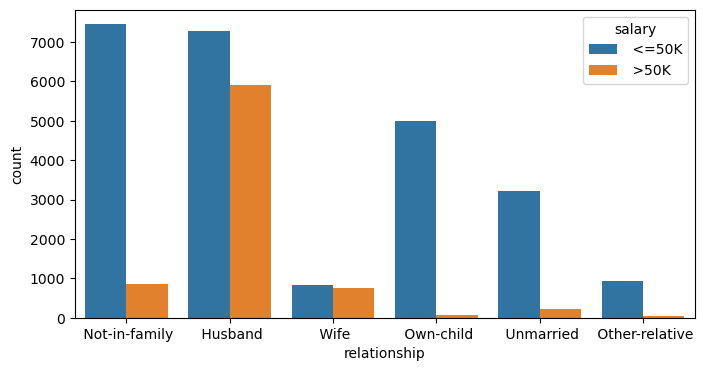

In [87]:
plt.figure(figsize = (8, 4))
sns.countplot(data = data_row, x ='relationship', hue ='salary')
plt.show()

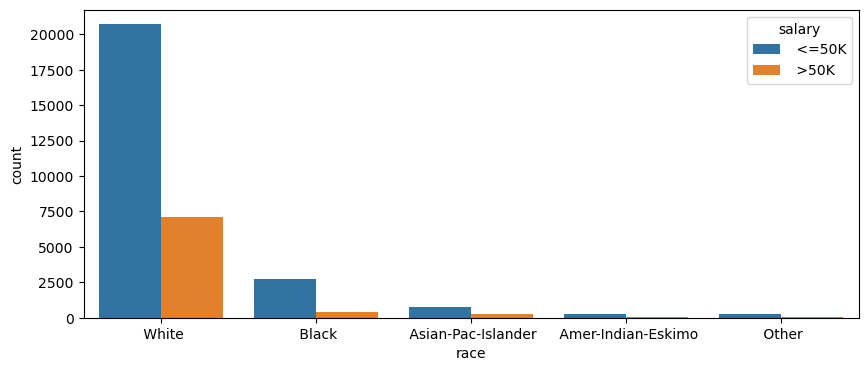

In [88]:
plt.figure(figsize = (10, 4))
sns.countplot(data = data_row, x ='race', hue ='salary')
plt.show()

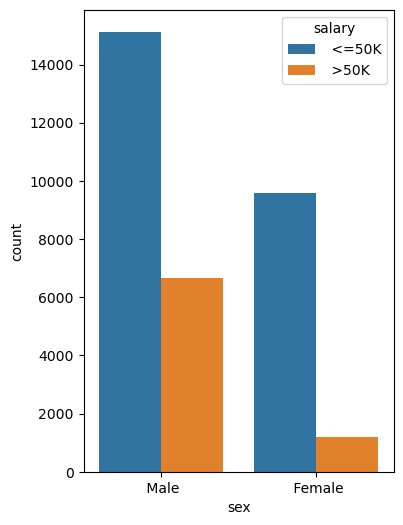

In [90]:
plt.figure(figsize = (4, 6))
sns.countplot(data = data_row, x ='sex', hue ='salary')
plt.show()

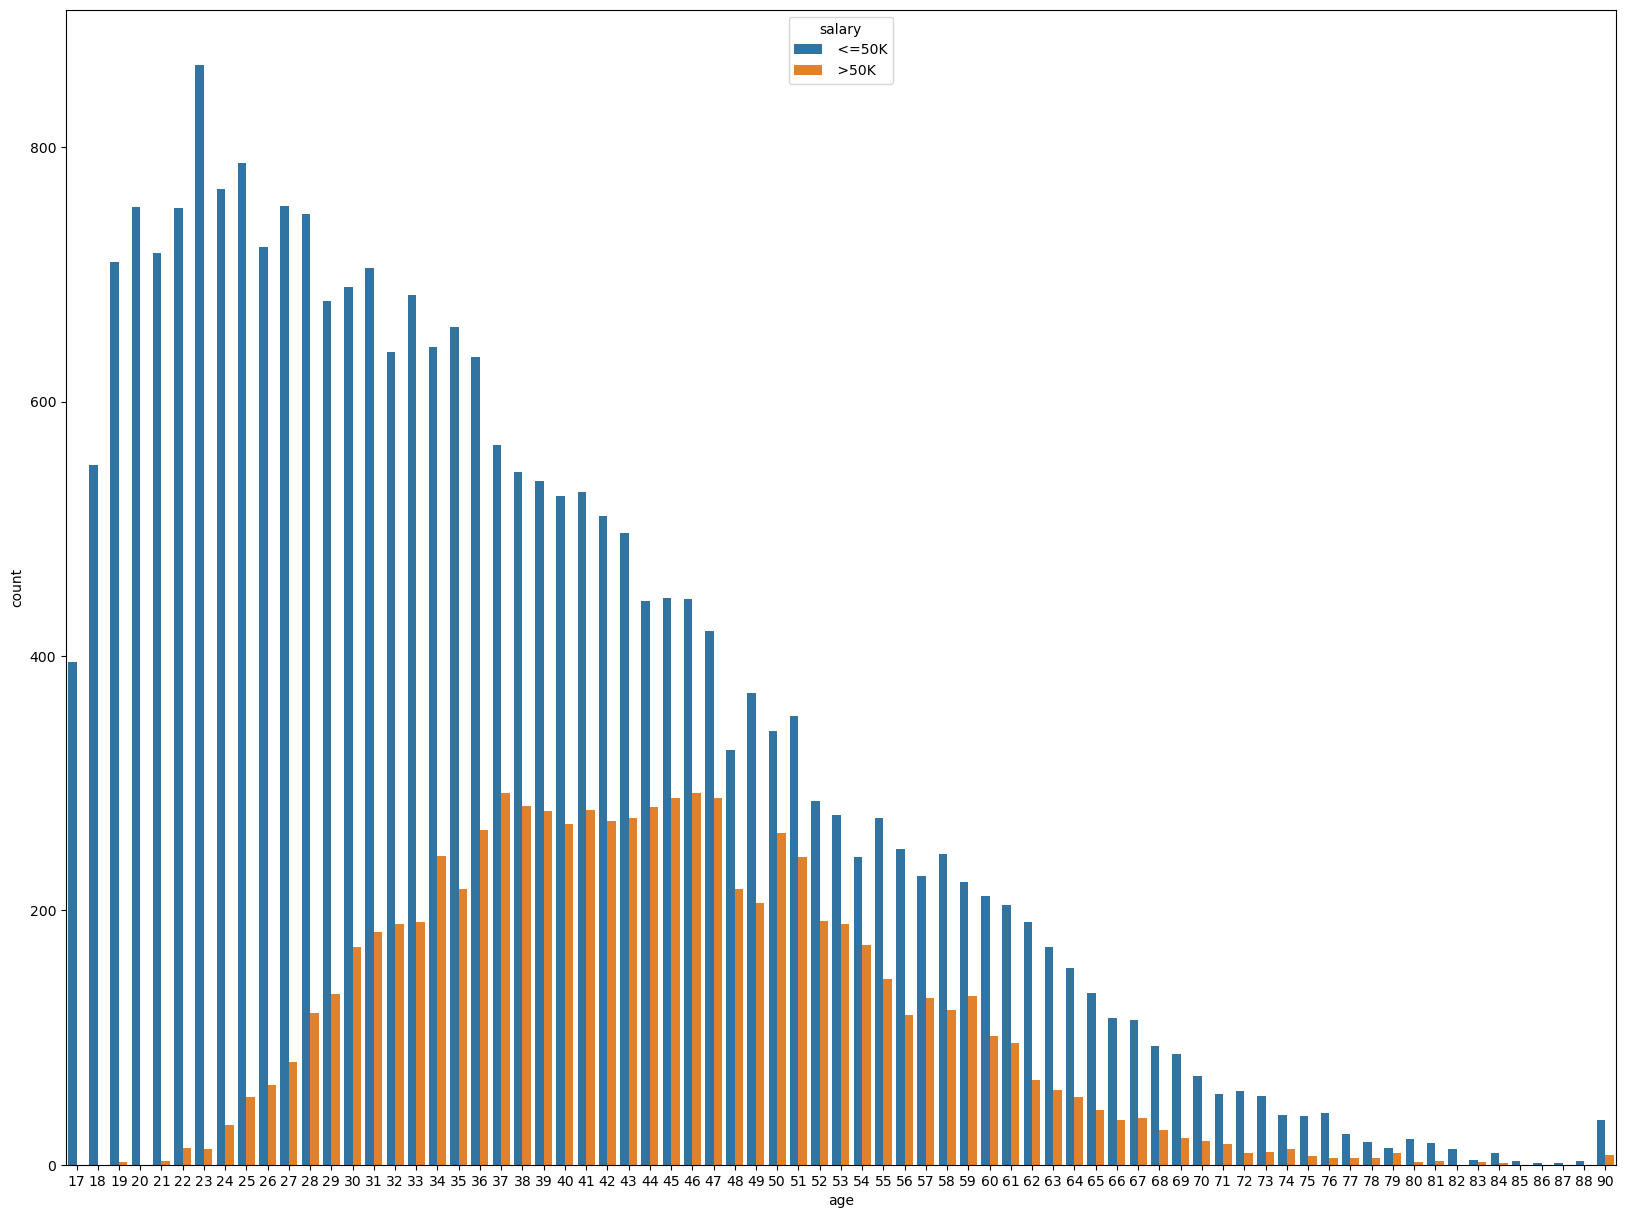

In [91]:
plt.figure(figsize=(20, 15))
sns.countplot(data=data_row, x='age', hue ='salary')
plt.show()

In [92]:
bin_category_parameters = [column for column in category_parameters if len(data_row[column].unique()) == 2]
bin_category_parameters

['sex', 'salary']

In [93]:
for column in bin_category_parameters:
  data_row[column] = data_row[column].map({data_row[column].unique()[0]: 0, data_row[column].unique()[1]: 1})

In [94]:
Notbin_category_parameters = [column for column in category_parameters if column not in bin_category_parameters]
Notbin_category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country']

In [95]:
data_row = pd.get_dummies(data_row, columns = Notbin_category_parameters, drop_first=True)

In [96]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 98 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   sex                                         32561 non-null  int64
 4   capital-gain                                32561 non-null  int64
 5   capital-loss                                32561 non-null  int64
 6   hours-per-week                              32561 non-null  int64
 7   salary                                      32561 non-null  int64
 8   workclass_ Local-gov                        32561 non-null  uint8
 9   workclass_ Never-worked                     32561 non-null  uint8
 10  workclass_ Private                

In [97]:
data_row.sex

0        0
1        0
2        0
3        0
4        1
        ..
32556    1
32557    0
32558    1
32559    0
32560    1
Name: sex, Length: 32561, dtype: int64

In [98]:
data_row.salary

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [99]:
data_row.drop('fnlwgt', axis=1, inplace=True)
data_row.drop('education-num', axis=1, inplace=True)
data_row.drop('capital-gain', axis=1, inplace=True)
data_row.drop('capital-loss', axis=1, inplace=True)

In [100]:
normalized_numeric_parameters = [column for column in data_row.columns if data_row[column].dtype.name != 'object']

In [101]:
scaler = MinMaxScaler()
data_row[normalized_numeric_parameters] = scaler.fit_transform(data_row[normalized_numeric_parameters])

In [102]:
data_row.describe()

,age,sex,hours-per-week,salary,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.330795,0.402423,0.240810,0.064279,0.000215,0.753417,0.034274,0.078038,0.039864,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.913762,0.002058,0.000491
std,0.186855,0.470506,0.125994,0.427581,0.245254,0.014661,0.431029,0.181935,0.268236,0.195642,...,0.033691,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.280720,0.045316,0.022162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,1.000000,0.448980,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Сбалансированность

Проверим признак уровень зарплаты на сбалансированность

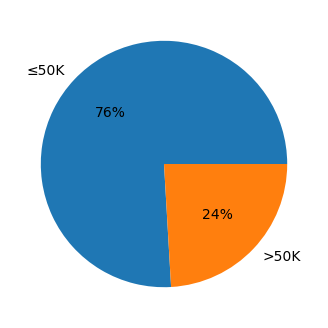

In [103]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette()

labels = ['≤50K', ">50K"]

plt.pie([data_row['salary'].value_counts()[0], data_row['salary'].value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

Мы можем решить проблему дисбаланса классов: применим метод увеличения числа примеров миноритарного класса с помощью SMOTE (Synthetic Minority Over-sampling Technique ).
Генерируем синтетические данные

In [48]:
X = data_row.iloc[:, data_row.columns != 'salary']
y = data_row['salary']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

Ниже представлен результат

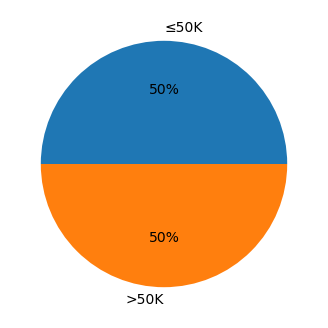

In [49]:
plt.figure(figsize = (4, 4))
colors = sns.color_palette()

labels = ['≤50K', ">50K"]

plt.pie([y_resampled.value_counts()[0], y_resampled.value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

# Разбиение данных на тестовую и обучающую выборку

Разбиение 70(обучающая)/30(тестовая)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=17)

Кол-во объектов в обучающей выборке

In [55]:
X_train.shape[0]

34608

Кол-во объектов в тестовой выборке

In [56]:
X_test.shape[0] 

14832

# Применение классификатора KNN(Алгоритм К-ближайших соседей)

1. Простота и лёгкость в реализации
2. Эффективность на небольших наборах данных
3. Легко обновляется при добавлении новых данных

k=1

In [66]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.9738788719371244, 0.8362324703344121)

Точность на обучающей выборке: 0.9738788719371244
Точность на тестовой выборке: 0.8362324703344121

k=2

In [65]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.9049352750809061, 0.8352211434735707)

Точность на обучающей выборке: 0.9049352750809061
Точность на тестовой выборке: 0.8352211434735707

k=3

In [67]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.9049352750809061, 0.8352211434735707)

Точность на обучающей выборке: 0.9049352750809061
Точность на тестовой выборке: 0.8352211434735707

k=5

In [68]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.879536523347203, 0.8294902912621359)

In [69]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.8504969949144706, 0.8187702265372169)

Точность на обучающей выборке: 0.8504969949144706
Точность на тестовой выборке: 0.8187702265372169

k=15

In [71]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.8360494683310218, 0.8135787486515642)

Точность на обучающей выборке: 0.8360494683310218
Точность на тестовой выборке: 0.8135787486515642

Лучший результат KNN показал при k=3
При k=1,2 точность на обучающей и тестовой выборке сильно отличаются. Наблюдаем большое количество переобучений
При k=3 сохроняется высокая точность, при этом на обучающей и тестовой выборке отличный результат в плане отличия точности.
При k>3 идет спад точности

Запустим KNN для различных k от 1 до 30, и проверим, правда ли k=3 лучший результат

In [72]:
scores = []

for i in range(1, 30, 1):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train, y_train)
     score_train = knn.score(X_train, y_train)
     score_test = knn.score(X_test, y_test)
     result = [i, score_train, score_test]
     scores.append(result)

scores

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

[[1, 0.9738788719371244, 0.8362324703344121],
 [2, 0.9218966712898752, 0.8073759439050702],
 [3, 0.9049352750809061, 0.8352211434735707],
 [4, 0.8886384650947757, 0.8236245954692557],
 [5, 0.879536523347203, 0.8294902912621359],
 [6, 0.872168284789644, 0.8267934196332255],
 [7, 0.8619394359685622, 0.8222087378640777],
 [8, 0.859454461396209, 0.8209277238403452],
 [9, 0.8525196486361535, 0.8201186623516721],
 [10, 0.8504969949144706, 0.8187702265372169],
 [11, 0.8437066574202496, 0.8156014023732471],
 [12, 0.8439956079519186, 0.8188376483279396],
 [13, 0.8394879796578826, 0.8168149946062567],
 [14, 0.8400947757743874, 0.8177588996763754],
 [15, 0.8360494683310218, 0.8135787486515642],
 [16, 0.8372630605640314, 0.8161407766990292],
 [17, 0.8343735552473417, 0.8135787486515642],
 [18, 0.8344313453536755, 0.8149946062567421],
 [19, 0.8313684697179843, 0.813915857605178],
 [20, 0.8315996301433195, 0.816747572815534],
 [21, 0.8287968099861304, 0.8152642934196332],
 [22, 0.829461396208969, 0.

Так и есть, k=3 - лучший результат.
Точность на обучающей выборке: 0.9049352750809061
Точность на тестовой выборке: 0.8352211434735707

# Обучающая выборка

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
     
y_train_predict = knn.predict(X_train)
knn_accuracy_train = accuracy_score(y_train_predict, y_train)
knn_err_train = 1 - knn_accuracy_train
print(f"Accuracy = {knn_accuracy_train}\nError = {knn_err_train}")

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy = 0.9049352750809061
Error = 0.0950647249190939


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


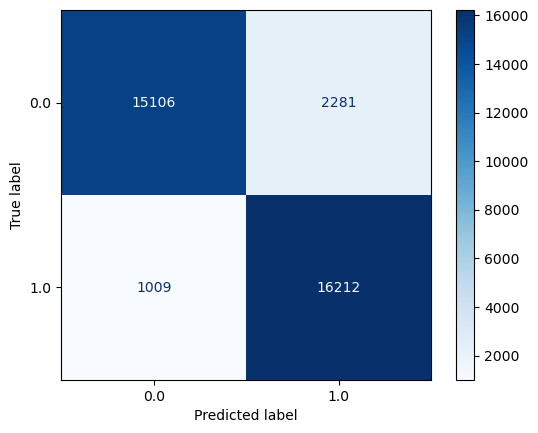

In [74]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, cmap ='Blues')

Число правильно классифицированных положительных объектов (TP): опрошенный получает ≤50 тыс - 15100
Число правильно классифицированных отрицательных объектов (TN): опрошенный получает >50 тыс - 16258

Число неправильно классифицированных положительных объектов (FN): опрошенный получает ≤50 тыс, но предсказано >50тыс. - 963
Число неправильно классифицированных отрицательных объектов (FP): опрошенный получает >50 тыс, но предсказано ≤50тыс. - 16258

FN классификатор неверно отнёс объект к рассматриваемому классу.
FP классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# Тестовая выборка

In [75]:
y_test_predict = knn.predict(X_test)
knn_accuracy_test = accuracy_score(y_test_predict, y_test)
knn_err_test = 1 - knn_accuracy_test
print(f"Accuracy = {knn_accuracy_test}\nError = {knn_err_test}")

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy = 0.8352211434735707
Error = 0.16477885652642932


Точность = 0.8352211434735707
Ошибка = 0.16477885652642932

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


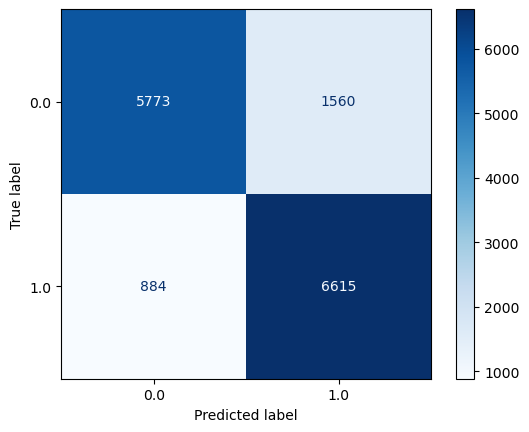

In [76]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap ='Blues')

Число правильно классифицированных положительных объектов (TP): опрошенный получает ≤50 тыс - 5776
Число правильно классифицированных отрицательных объектов (TN): опрошенный получает >50 тыс - 6640

Число неправильно классифицированных положительных объектов (FN): опрошенный получает ≤50 тыс, но предсказано >50тыс. - 859
Число неправильно классифицированных отрицательных объектов (FP): опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1557

FN классификатор неверно отнёс объект к рассматриваемому классу.
FP классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

Создаём и обучаем модель дерева решений
Оцениваем точность на обучающих и тестовых данных

max_depth - максимальная глубина дерева решений(если число большое, то дерево может стать слишком длинным = переобучение)

max_depth=1

In [110]:
tree = DecisionTreeClassifier(max_depth=1, random_state=42) 
tree.fit(X_train, y_train)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print(f"Точность на обучающих данных: {tree_train_score:.2f}")
print(f"Точность на тестовых данных: {tree_test_score:.2f}")

Точность на обучающих данных: 0.76
Точность на тестовых данных: 0.76


max_depth=2

In [111]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree.fit(X_train, y_train)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print(f"Точность на обучающих данных: {tree_train_score:.2f}")
print(f"Точность на тестовых данных: {tree_test_score:.2f}")

Точность на обучающих данных: 0.77
Точность на тестовых данных: 0.78


max_depth=3

In [112]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42) 
tree.fit(X_train, y_train)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print(f"Точность на обучающих данных: {tree_train_score:.2f}")
print(f"Точность на тестовых данных: {tree_test_score:.2f}")

Точность на обучающих данных: 0.78
Точность на тестовых данных: 0.77


max_depth=5

In [113]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42) 
tree.fit(X_train, y_train)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print(f"Точность на обучающих данных: {tree_train_score:.2f}")
print(f"Точность на тестовых данных: {tree_test_score:.2f}")

Точность на обучающих данных: 0.80
Точность на тестовых данных: 0.79


max_depth=10

In [114]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42) 
tree.fit(X_train, y_train)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print(f"Точность на обучающих данных: {tree_train_score:.2f}")
print(f"Точность на тестовых данных: {tree_test_score:.2f}")

Точность на обучающих данных: 0.80
Точность на тестовых данных: 0.79


max_depth=15

In [115]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42) 
tree.fit(X_train, y_train)
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print(f"Точность на обучающих данных: {tree_train_score:.2f}")
print(f"Точность на тестовых данных: {tree_test_score:.2f}")

Точность на обучающих данных: 0.80
Точность на тестовых данных: 0.79


# Сравнение KNN и дерева решений

Сравнение точности
1. 

Алгоритм KNN дольше обучается, однако у него лучше точность. Также KNN сильно чувствителен к выбросам, что может повлиять на ближаших соседей.

# Вывод

Исходное распределение классов

Визуализация (круговая диаграмма) показала, что класс "≤50K" доминирует над ">50K", что указывает на дисбаланс классов.
Предобработка данных

Обнаружены пропущенные значения в workclass, occupation и native-country, которые заменены модами соответствующих колонок.
Числовые данные были нормализованы с помощью MinMaxScaler.
Удалены незначащие признаки (fnlwgt, education-num, capital-gain, capital-loss).
Категориальные переменные закодированы (One-Hot Encoding).
Корреляционный анализ

Построена тепловая карта корреляций, выявившая наиболее зависимые переменные.
Визуализация распределений

Гистограммы показали, как различные факторы (образование, семейное положение, пол и т.д.) связаны с уровнем зарплаты.
Балансировка классов

Метод SMOTE применён для уравнивания количества примеров в обоих классах.
После балансировки классов снова построена круговая диаграмма, показывающая равномерное распределение.
Обучение KNN

Тестировались различные значения n_neighbors (от 1 до 15).
Оптимальным оказалось значение n_neighbors=3, обеспечивающее хороший баланс между обучающей и тестовой выборками.
Результаты KNN (n_neighbors=3):

Точность на обучающей выборке: Высокая (около 0.9), что говорит о хорошей подгонке к данным.
Точность на тестовой выборке: Немного ниже (около 0.8), но не свидетельствует о сильного переобучения.
Матрицы ошибок построены для обеих выборок, показывая распределение правильных и ошибочных предсказаний.